<a href="https://colab.research.google.com/github/mpalominocol/Projects/blob/main/SP500_AND_WB_Data_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Load Economic indicators

In [ ]:
# Import libraries
import pandas as pd
import requests
import json


## **Step 1:** Define parameters for indicators extractions.

**List of countreis:**

US: EEUU  
CA: Canada  
FR: France  
DE: Germany
IT: Italy  
JP: Japan  
GB: Greate Britan
CN: China
RU: Russia

---
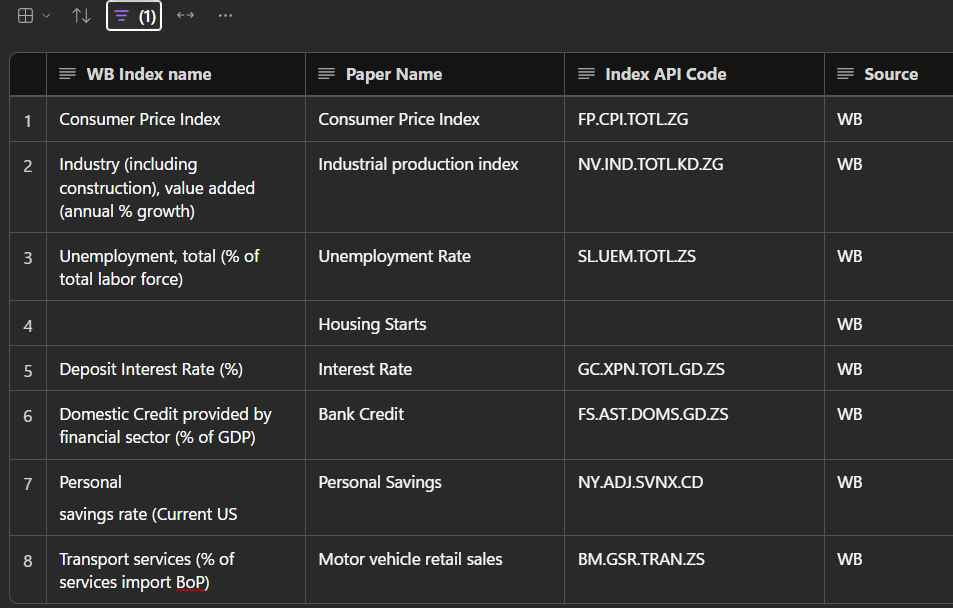
Indicators =
'FP.CPI.TOTL.ZG' = Consumer Price Index , 'NV.IND.TOTL.KD.ZG','SL.UEM.TOTL.ZS','SP.POP.TOTL','GC.XPN.TOTL.GD.ZS', 'FS.AST.DOMS.GD.ZS','NY.ADJ.SVNX.CD','BM.GSR.TRAN.ZS']


### World Bank API Parameters

In [ ]:
# Extract parameters for WB API indicators
# Countries
countries = ['US','CA','FR','DE','IT','JP','GB','CN','RU']
# Economic Indicators
indicators = ['FP.CPI.TOTL.ZG', 'NV.IND.TOTL.KD.ZG','SL.UEM.TOTL.ZS','SP.POP.TOTL','GC.XPN.TOTL.GD.ZS', 'FS.AST.DOMS.GD.ZS','NY.ADJ.SVNX.CD','BM.GSR.TRAN.ZS']
start_date = '1900'
end_date = '2025'

### Loop for WB indicators Extraction

In [ ]:
# indicators extraction Loop

data = []

for country in countries:
    for indicator in indicators:
        url = f'https://api.worldbank.org/v2/country/{country}/indicator/{indicator}?date={start_date}:{end_date}&format=json'
        response = requests.get(url)
        try:
            data_json = response.json()
            if len(data_json) > 1:  # Check if data is available
                for item in data_json[1]:
                    data.append([
                        country,
                        item['date'][:4], #Year
                        indicator,
                        item['value']
                    ])
        except (json.JSONDecodeError, KeyError, IndexError) as e:
            print(f"Error processing data for {country}, {indicator}: {e}")
            print(response.text)

df_indicators = pd.DataFrame(data, columns=['Country', 'Year', 'Indicator', 'Value'])


### Format Extraction Resul

In [ ]:
# Pivot to convert data table into desaire format

# Pivot the DataFrame to have indicators as columns
pvt_indicators = df_indicators.pivot_table(index=['Year'], columns=['Country','Indicator'], values='Value').reset_index()

# Rename columns to include country in column name
new_columns = []
for col in pvt_indicators.columns:
    if isinstance(col, tuple):
        new_columns.append(f"{col[0]}_{col[1]}")  # Concatenate country and indicator
    else:
        new_columns.append(col)

pvt_indicators.columns = new_columns


### Visual of extraction result

In [ ]:
# Last Years available

pvt_indicators.tail()

,Year_,CA_BM.GSR.TRAN.ZS,CA_FP.CPI.TOTL.ZG,CA_FS.AST.DOMS.GD.ZS,CA_GC.XPN.TOTL.GD.ZS,CA_NV.IND.TOTL.KD.ZG,CA_NY.ADJ.SVNX.CD,CA_SL.UEM.TOTL.ZS,CA_SP.POP.TOTL,CN_BM.GSR.TRAN.ZS,...,RU_NY.ADJ.SVNX.CD,RU_SL.UEM.TOTL.ZS,RU_SP.POP.TOTL,US_BM.GSR.TRAN.ZS,US_FP.CPI.TOTL.ZG,US_FS.AST.DOMS.GD.ZS,US_GC.XPN.TOTL.GD.ZS,US_NY.ADJ.SVNX.CD,US_SL.UEM.TOTL.ZS,US_SP.POP.TOTL
45,2019,19.413684,1.949269,NaN,15.163927,0.288035,1.038381e+11,5.690,37618495.0,20.801686,...,1.190286e+11,4.496,145453291.0,19.014151,1.812210,246.211031,13.330023,1.498549e+12,3.669,328329953.0
46,2020,16.786701,0.717000,NaN,25.320352,-5.883383,6.282113e+10,9.657,38028638.0,24.823521,...,1.253701e+11,5.589,145245148.0,15.617915,1.233584,281.470939,19.614290,1.236543e+12,8.055,331526933.0
47,2021,17.964439,3.395193,NaN,19.696654,5.627890,1.503378e+11,7.527,38239864.0,33.284173,...,1.130492e+11,4.715,144746762.0,18.742224,4.697859,292.804695,20.432473,1.032177e+12,5.349,332048977.0
48,2022,19.091339,6.802801,NaN,15.712357,3.206648,NaN,5.280,38939056.0,36.627693,...,NaN,3.867,144236933.0,22.091717,8.002800,250.091382,15.513263,NaN,3.650,333271411.0
49,2023,16.658197,3.879002,NaN,NaN,-0.895394,NaN,5.366,40097761.0,29.656727,...,NaN,3.325,143826130.0,19.095557,4.116338,254.243541,NaN,NaN,3.625,334914895.0


In [ ]:
pvt_indicators.head()

,Year_,CA_BM.GSR.TRAN.ZS,CA_FP.CPI.TOTL.ZG,CA_FS.AST.DOMS.GD.ZS,CA_GC.XPN.TOTL.GD.ZS,CA_NV.IND.TOTL.KD.ZG,CA_NY.ADJ.SVNX.CD,CA_SL.UEM.TOTL.ZS,CA_SP.POP.TOTL,CN_BM.GSR.TRAN.ZS,...,RU_NY.ADJ.SVNX.CD,RU_SL.UEM.TOTL.ZS,RU_SP.POP.TOTL,US_BM.GSR.TRAN.ZS,US_FP.CPI.TOTL.ZG,US_FS.AST.DOMS.GD.ZS,US_GC.XPN.TOTL.GD.ZS,US_NY.ADJ.SVNX.CD,US_SL.UEM.TOTL.ZS,US_SP.POP.TOTL
0,1974,33.965176,10.997171,56.001492,NaN,NaN,NaN,NaN,22807969.0,NaN,...,NaN,NaN,133432000.0,37.165282,11.054805,113.781809,NaN,NaN,NaN,213854000.0
1,1975,35.180688,10.672189,57.177955,NaN,NaN,NaN,NaN,23143275.0,NaN,...,NaN,NaN,134200000.0,35.788056,9.143147,113.664693,NaN,NaN,NaN,215973000.0
2,1976,30.395284,7.541739,58.797823,NaN,NaN,NaN,NaN,23449808.0,NaN,...,NaN,NaN,135147000.0,37.816138,5.744813,113.992250,NaN,NaN,NaN,218035000.0
3,1977,29.246262,7.976445,73.988579,NaN,NaN,NaN,NaN,23725843.0,NaN,...,NaN,NaN,136100000.0,38.798408,6.501684,113.624040,NaN,NaN,NaN,220239000.0
4,1978,28.284617,8.973723,78.544220,NaN,NaN,NaN,NaN,23963203.0,NaN,...,NaN,NaN,137060000.0,37.898391,7.630964,113.720597,NaN,NaN,NaN,222585000.0


**Result:** We have economic indicators from 1975 to for the countries.

In [ ]:
df_num =pvt_indicators.iloc[:,1:]

In [ ]:
# Export to CSV
pvt_indicators.to_csv('world_bank_data.csv', index=False)

#### Missing values verification

In [ ]:
# Verify missing values

# Check for missing values in the DataFrame
missing_values = pvt_indicators.isnull().sum()

# Print the count of missing values for each column
print("Missing Values per Column:\n", missing_values)

# Calculate the percentage of missing values for each column
missing_percentage = (pvt_indicators.isnull().sum() / len(pvt_indicators)) * 100

# Print the percentage of missing values for each column
print("\nMissing Value Percentage per Column:\n", missing_percentage)



Missing Values per Column:
 Year_                    0
CA_BM.GSR.TRAN.ZS        0
CA_FP.CPI.TOTL.ZG        0
CA_FS.AST.DOMS.GD.ZS    17
CA_GC.XPN.TOTL.GD.ZS    17
                        ..
US_FS.AST.DOMS.GD.ZS     0
US_GC.XPN.TOTL.GD.ZS    16
US_NY.ADJ.SVNX.CD       18
US_SL.UEM.TOTL.ZS       17
US_SP.POP.TOTL           0
Length: 66, dtype: int64

Missing Value Percentage per Column:
 Year_                    0.0
CA_BM.GSR.TRAN.ZS        0.0
CA_FP.CPI.TOTL.ZG        0.0
CA_FS.AST.DOMS.GD.ZS    34.0
CA_GC.XPN.TOTL.GD.ZS    34.0
                        ... 
US_FS.AST.DOMS.GD.ZS     0.0
US_GC.XPN.TOTL.GD.ZS    32.0
US_NY.ADJ.SVNX.CD       36.0
US_SL.UEM.TOTL.ZS       34.0
US_SP.POP.TOTL           0.0
Length: 66, dtype: float64


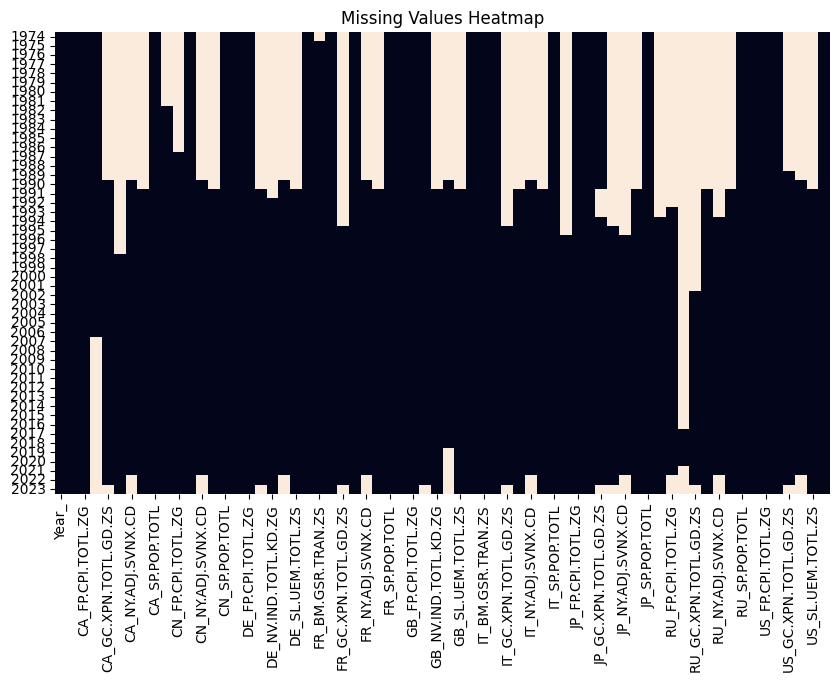

In [ ]:
# Missing values Chat
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Use 'Year_' instead of 'Year' to access the correct column
sns.heatmap(pvt_indicators.isnull(), cbar=False, yticklabels=pvt_indicators['Year_'])
plt.title('Missing Values Heatmap')
plt.show()

### There is more informaiton since 1990

## Step2:  Correlation


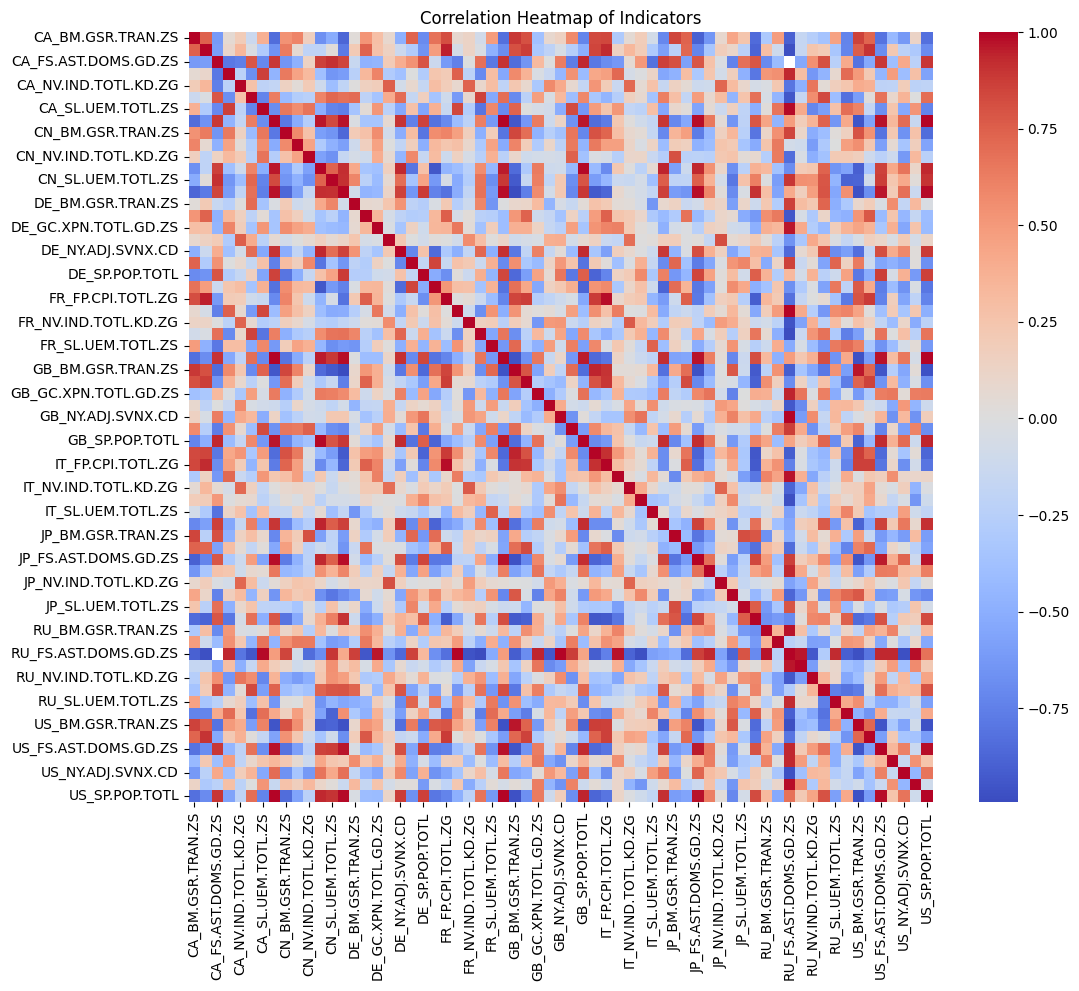

In [ ]:
# prompt: Correlation heat map for pvt_indicators

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_num.corr(), cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Indicators')
plt.show()

Correlations over 0.95:
Total Correlations above
65


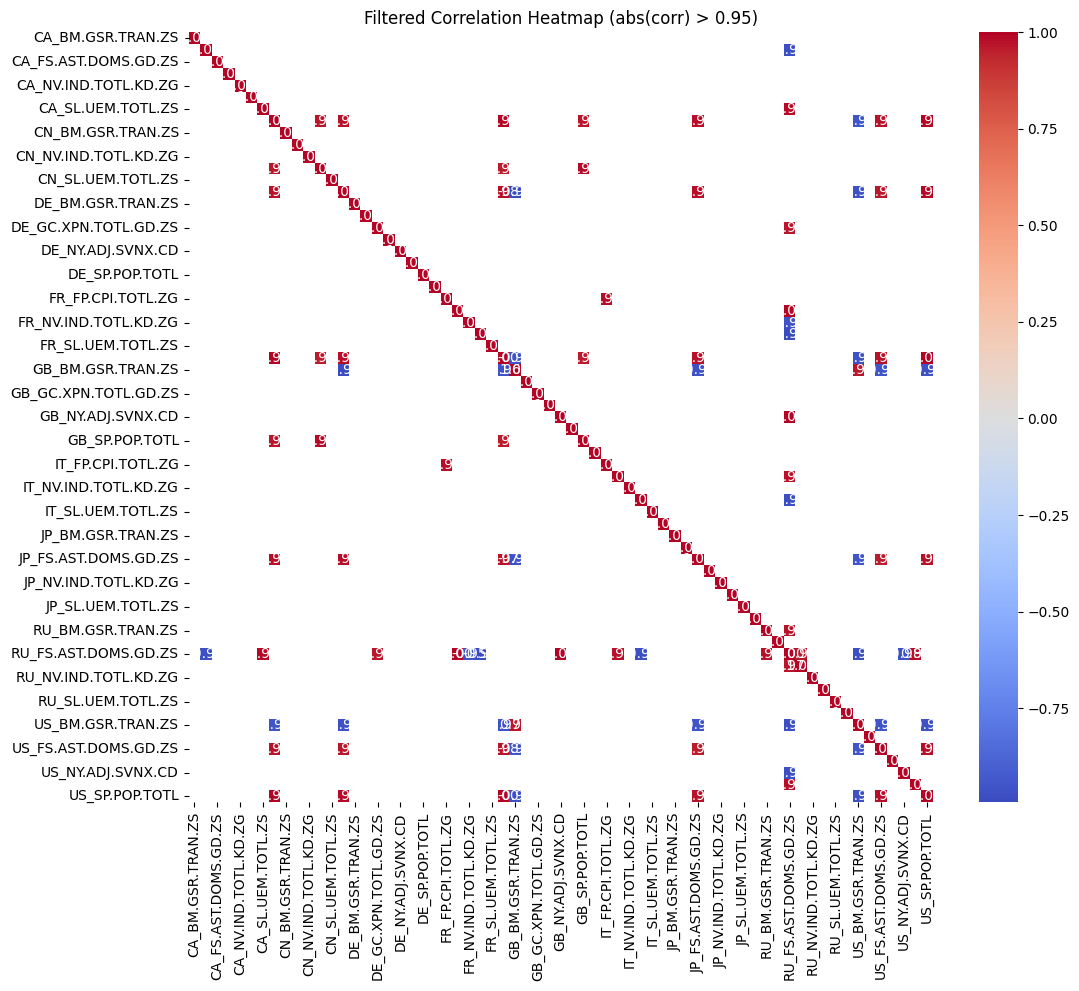

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_num.corr()

# Filter correlations above 0.95 (excluding self-correlations)
filtered_correlations = correlation_matrix[abs(correlation_matrix) > 0.95]

# Print count of correlations above 0.95
print("Correlations over 0.95:")

print("Total Correlations above",  )
cor_over = filtered_correlations.count()
print(cor_over.count())

# Plotting the filtered correlations
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_correlations, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Filtered Correlation Heatmap (abs(corr) > 0.95)')
plt.show()

In [ ]:
# Count "not nulls" in filtered_correlations1

# Count non-null values in the filtered_correlations1 DataFrame
non_null_count = filtered_correlations.notnull().sum().sum()

print(f"Number of 'not nulls' in filtered_correlations1: {non_null_count}")

Number of 'not nulls' in filtered_correlations1: 159


In [ ]:

# Count the total number of columns in the pvt_indicators DataFrame
total_columns = len(pvt_indicators.columns)
total_columns

66

In [ ]:
# Total not null - total of variables  - 1, that represent year and dividade by 2 because is a simtrical matrix
(non_null_count - total_columns - 1) /2

46.0

## 46 varaibles have a correlation over 95%

#2 Getting ETF Historical Price Data

## Step 1: Conect to API and extract Data

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf

# Download data for a specific ETF (e.g., SPY)
etf = yf.download('SPY', start='1900-01-01', end='2025-01-01')

etf.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
1993-01-29 00:00:00+00:00,24.608622,43.93750,43.96875,43.75000,43.96875,1003200
1993-02-01 00:00:00+00:00,24.783649,44.25000,44.25000,43.96875,43.96875,480500
1993-02-02 00:00:00+00:00,24.836168,44.34375,44.37500,44.12500,44.21875,201300
1993-02-03 00:00:00+00:00,25.098690,44.81250,44.84375,44.37500,44.40625,529400
1993-02-04 00:00:00+00:00,25.203705,45.00000,45.09375,44.46875,44.96875,531500


In [ ]:
etf.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2024-10-30 00:00:00+00:00,580.010010,580.010010,583.320007,579.289978,581.289978,41435800
2024-10-31 00:00:00+00:00,568.640015,568.640015,575.630005,568.440002,575.559998,60182500
2024-11-01 00:00:00+00:00,571.039978,571.039978,575.549988,570.619995,571.320007,45667500
2024-11-04 00:00:00+00:00,569.809998,569.809998,572.500000,567.890015,571.179993,38217000
2024-11-05 00:00:00+00:00,576.700012,576.700012,576.739990,570.520020,570.739990,38620741


In [ ]:
etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8000 entries, 1993-01-29 00:00:00+00:00 to 2024-11-05 00:00:00+00:00
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Close, SPY)  8000 non-null   float64
 1   (Close, SPY)      8000 non-null   float64
 2   (High, SPY)       8000 non-null   float64
 3   (Low, SPY)        8000 non-null   float64
 4   (Open, SPY)       8000 non-null   float64
 5   (Volume, SPY)     8000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 437.5 KB


## Step 2: Resamble data on  Yearly bases

In [ ]:
# Resample daily ETF prices to yearly
etf_yearly = etf['Adj Close'].resample('YE').mean()

etf_yearly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 1993-12-31 00:00:00+00:00 to 2024-12-31 00:00:00+00:00
Freq: YE-DEC
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     32 non-null     float64
dtypes: float64(1)
memory usage: 512.0 bytes


In [ ]:
# Set the DateTime index to the Year
etf_yearly['Year'] = etf_yearly.index.year  # Create a new column with just the year

# Optionally, you can drop the DateTime index if you only want the Year column
etf_yearly.reset_index(drop=True, inplace=True)

# etf_yearly

# Set 'Year' as the index
etf_yearly.set_index('Year', inplace=True)

In [ ]:
etf_yearly.tail()

Ticker,SPY
Year,
2020,301.390253
2021,406.294688
2022,394.980027
2023,419.735737
2024,528.820665


In [ ]:
etf_yearly.head()

Ticker,SPY
Year,
1993,25.703472
1994,26.761102
1995,32.336435
1996,40.853854
1997,54.157629


# 3 Meger SP500 ETF data with Economics index

In [ ]:
# prompt: In  pvt_indicators change column Year_ to int32

pvt_indicators['Year_'] = pvt_indicators['Year_'].astype('int32')

In [ ]:
etf_yearly.info()


<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 1993 to 2024
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     32 non-null     float64
dtypes: float64(1)
memory usage: 384.0 bytes


In [ ]:
# Merge the two DataFrames based on the "Year" column
merged_df = pd.merge(pvt_indicators, etf_yearly, left_on='Year_', right_on='Year', how='inner')

merged_df['Returns'] = merged_df['SPY'] - merged_df['SPY'].shift(1)

# Display the merged DataFrame
merged_df.head(10)

,Year_,CA_BM.GSR.TRAN.ZS,CA_FP.CPI.TOTL.ZG,CA_FS.AST.DOMS.GD.ZS,CA_GC.XPN.TOTL.GD.ZS,CA_NV.IND.TOTL.KD.ZG,CA_NY.ADJ.SVNX.CD,CA_SL.UEM.TOTL.ZS,CA_SP.POP.TOTL,CN_BM.GSR.TRAN.ZS,...,RU_SP.POP.TOTL,US_BM.GSR.TRAN.ZS,US_FP.CPI.TOTL.ZG,US_FS.AST.DOMS.GD.ZS,US_GC.XPN.TOTL.GD.ZS,US_NY.ADJ.SVNX.CD,US_SL.UEM.TOTL.ZS,US_SP.POP.TOTL,SPY,Returns
0,1993,24.621099,1.865079,112.053218,22.650685,NaN,2.221179e+10,11.377,28684764.0,45.521768,...,148458777.0,29.319469,2.951657,158.395173,14.539206,3.990089e+11,6.900,259919000.0,25.703472,NaN
1,1994,25.013835,0.165563,111.569348,21.233453,NaN,3.715584e+10,10.395,29000663.0,46.757470,...,148407912.0,29.734360,2.607442,156.338856,13.818682,5.196490e+11,6.119,263126000.0,26.761102,1.057630
2,1995,24.860741,2.148760,110.652449,20.922151,NaN,4.909413e+10,9.489,29302311.0,37.767823,...,148375787.0,29.837352,2.805420,166.236499,13.545209,5.612486e+11,5.650,266278000.0,32.336435,5.575332
3,1996,22.461121,1.570531,115.187699,19.788587,NaN,5.128315e+10,9.620,29610218.0,45.658623,...,148160129.0,28.656178,2.931204,171.585278,12.990761,6.635695e+11,5.451,269394000.0,40.853854,8.517419
4,1997,22.778208,1.621216,117.093820,17.829738,NaN,5.817502e+10,9.101,29905948.0,35.168682,...,147915361.0,28.688846,2.337690,180.069289,12.484564,8.255616e+11,5.000,272657000.0,54.157629,13.303775
5,1998,21.714179,0.995942,115.546369,17.611497,2.869532,4.429286e+10,8.279,30155173.0,24.860315,...,147670784.0,28.145409,1.552279,190.517731,12.030807,8.968669e+11,4.511,275854000.0,68.256300,14.098671
6,1999,21.144078,1.734843,113.950851,17.300631,5.988102,5.793827e+10,7.583,30401286.0,24.602112,...,147214776.0,25.359987,2.188027,201.879418,11.716331,8.945149e+11,4.219,279040000.0,84.508033,16.251733
7,2000,21.807265,2.719440,110.691796,16.446170,6.340524,7.610896e+10,6.829,30685730.0,28.664191,...,146596869.0,26.490864,3.376857,191.592429,11.695694,9.039917e+11,3.992,282162411.0,91.793230,7.285197
8,2001,21.432663,2.525120,197.192768,16.348037,-0.706038,6.449669e+10,7.219,31020855.0,28.702131,...,145976482.0,25.478071,2.826171,199.357262,12.205633,8.169706e+11,4.731,284968955.0,77.748728,-14.044502
9,2002,21.133000,2.258394,191.626759,15.580299,2.955297,6.273272e+10,7.665,31359199.0,29.108436,...,145306497.0,23.727616,1.586032,192.652542,12.412434,7.154314e+11,5.783,287625193.0,65.637449,-12.111279


## 2.1 Data Preparation

In [ ]:
etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8000 entries, 1993-01-29 00:00:00+00:00 to 2024-11-05 00:00:00+00:00
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Close, SPY)  8000 non-null   float64
 1   (Close, SPY)      8000 non-null   float64
 2   (High, SPY)       8000 non-null   float64
 3   (Low, SPY)        8000 non-null   float64
 4   (Open, SPY)       8000 non-null   float64
 5   (Volume, SPY)     8000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 437.5 KB


In [ ]:
df_candel = etf

In [ ]:
df_candel.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8000 entries, 1993-01-29 00:00:00+00:00 to 2024-11-05 00:00:00+00:00
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Close, SPY)  8000 non-null   float64
 1   (Close, SPY)      8000 non-null   float64
 2   (High, SPY)       8000 non-null   float64
 3   (Low, SPY)        8000 non-null   float64
 4   (Open, SPY)       8000 non-null   float64
 5   (Volume, SPY)     8000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 437.5 KB


## Step 1 : Generate  

In [ ]:
# prompt: in df_candel calculate year, quater and week from DatetimeIndex and include week, month, quartely and year as separete columns

# Assuming df_candel is already defined as in your provided code.
df_candel['Year'] = df_candel.index.year
df_candel['Quarter'] = df_candel.index.quarter
df_candel['Week'] = df_candel.index.isocalendar().week
df_candel['Month'] = df_candel.index.month

In [ ]:
df_candel.head()

Price,Adj Close,Close,High,Low,Open,Volume,Year,Quarter,Week,Month
Ticker,SPY,SPY,SPY,SPY,SPY,SPY,,,,
Date,,,,,,,,,,
1993-01-29 00:00:00+00:00,24.608622,43.93750,43.96875,43.75000,43.96875,1003200,1993,1,4,1
1993-02-01 00:00:00+00:00,24.783649,44.25000,44.25000,43.96875,43.96875,480500,1993,1,5,2
1993-02-02 00:00:00+00:00,24.836168,44.34375,44.37500,44.12500,44.21875,201300,1993,1,5,2
1993-02-03 00:00:00+00:00,25.098690,44.81250,44.84375,44.37500,44.40625,529400,1993,1,5,2
1993-02-04 00:00:00+00:00,25.203705,45.00000,45.09375,44.46875,44.96875,531500,1993,1,5,2


In [ ]:
# Concatenate columns to generate period goups


# Concatenate 'Year' and 'Week' columns into 'YearWeek'
df_candel['YearQuarter'] = df_candel['Year'].astype(str) + df_candel['Quarter'].astype(str).str.zfill(2)
df_candel['YearMonth'] = df_candel['Year'].astype(str) + df_candel['Month'].astype(str).str.zfill(2)
df_candel['YearWeek'] = df_candel['Year'].astype(str) + df_candel['Week'].astype(str).str.zfill(2)

In [ ]:
df_candel.head()

Price,Adj Close,Close,High,Low,Open,Volume,Year,Quarter,Week,Month,YearQuarter,YearMonth,YearWeek
Ticker,SPY,SPY,SPY,SPY,SPY,SPY,,,,,,,
Date,,,,,,,,,,,,,
1993-01-29 00:00:00+00:00,24.608622,43.93750,43.96875,43.75000,43.96875,1003200,1993,1,4,1,199301,199301,199304
1993-02-01 00:00:00+00:00,24.783649,44.25000,44.25000,43.96875,43.96875,480500,1993,1,5,2,199301,199302,199305
1993-02-02 00:00:00+00:00,24.836168,44.34375,44.37500,44.12500,44.21875,201300,1993,1,5,2,199301,199302,199305
1993-02-03 00:00:00+00:00,25.098690,44.81250,44.84375,44.37500,44.40625,529400,1993,1,5,2,199301,199302,199305
1993-02-04 00:00:00+00:00,25.203705,45.00000,45.09375,44.46875,44.96875,531500,1993,1,5,2,199301,199302,199305


In [ ]:
# prompt: In df_candel create a column 'WeekHist', in column  'WeekHist'  put count of weeks since the first date in index 'Date'  until date row that is been calculated

# Assuming df_candel is already defined as in your provided code.
# Calculate the week difference from the first date
df_candel['WeekHist'] = (df_candel.index - df_candel.index.min()).days // 7 + 1
df_candel.head()

Price,Adj Close,Close,High,Low,Open,Volume,Year,Quarter,Week,Month,YearQuarter,YearMonth,YearWeek,WeekHist
Ticker,SPY,SPY,SPY,SPY,SPY,SPY,,,,,,,,
Date,,,,,,,,,,,,,,
1993-01-29 00:00:00+00:00,24.608622,43.93750,43.96875,43.75000,43.96875,1003200,1993,1,4,1,199301,199301,199304,1
1993-02-01 00:00:00+00:00,24.783649,44.25000,44.25000,43.96875,43.96875,480500,1993,1,5,2,199301,199302,199305,1
1993-02-02 00:00:00+00:00,24.836168,44.34375,44.37500,44.12500,44.21875,201300,1993,1,5,2,199301,199302,199305,1
1993-02-03 00:00:00+00:00,25.098690,44.81250,44.84375,44.37500,44.40625,529400,1993,1,5,2,199301,199302,199305,1
1993-02-04 00:00:00+00:00,25.203705,45.00000,45.09375,44.46875,44.96875,531500,1993,1,5,2,199301,199302,199305,1


In [ ]:
df_candel.tail()

Price,Adj Close,Close,High,Low,Open,Volume,Year,Quarter,Week,Month,YearQuarter,YearMonth,YearWeek,WeekHist
Ticker,SPY,SPY,SPY,SPY,SPY,SPY,,,,,,,,
Date,,,,,,,,,,,,,,
2024-10-30 00:00:00+00:00,580.010010,580.010010,583.320007,579.289978,581.289978,41435800,2024,4,44,10,202404,202410,202444,1657
2024-10-31 00:00:00+00:00,568.640015,568.640015,575.630005,568.440002,575.559998,60182500,2024,4,44,10,202404,202410,202444,1657
2024-11-01 00:00:00+00:00,571.039978,571.039978,575.549988,570.619995,571.320007,45667500,2024,4,44,11,202404,202411,202444,1658
2024-11-04 00:00:00+00:00,569.809998,569.809998,572.500000,567.890015,571.179993,38217000,2024,4,45,11,202404,202411,202445,1658
2024-11-05 00:00:00+00:00,576.700012,576.700012,576.739990,570.520020,570.739990,38620741,2024,4,45,11,202404,202411,202445,1658


## Data information

In candlestick charts, each candlestick represents four key pieces of information for a specific period (e.g., daily, weekly, etc.):

**Open:** The price at which the period started.

**Close:** The price at which the period ended.

**High:** The highest price reached during the period.

**Low:** The lowest price reached during the period.

**Volume:** The total number of shares or contracts traded during the period.

In [ ]:
# Group by 'YearWeek' and get the first 'Open' date for each week
df_weekly = df_candel.groupby('WeekHist')['Close'].first().reset_index()
df_weekly

Price,WeekHist,Close
Ticker,,SPY
0,1,43.937500
1,2,44.968750
2,3,44.593750
3,4,43.562500
4,5,44.406250
...,...,...
1653,1654,572.979980
1654,1655,579.580017
1655,1656,584.590027


In [ ]:
type(df_weekly)

pandas.core.frame.DataFrame

In [ ]:
# Calculate the rolling standard deviation of 'Close' for each week

std_dev = df_candel.groupby('WeekHist').std()
std_dev['Close']




Ticker,SPY
WeekHist,
1,0.431884
2,0.150520
3,0.578688
4,0.357263
5,0.362689
...,...
1654,3.640756
1655,1.988827
1656,2.936956


In [ ]:
type(std_dev)

pandas.core.frame.DataFrame

In [ ]:
#
df_weekly['stdW'] = std_dev['Close']

In [ ]:
print(std_dev.shape)
print(df_weekly.shape)

(1658, 13)
(1658, 3)


In [ ]:
# prompt: Concattenate COLUM std_dev['Close'] TO df_weekly

df_weekly = pd.concat([df_weekly, std_dev['Close']], axis=1)

In [ ]:
df_weekly

,"(WeekHist, )","(Close, SPY)","(stdW, )",SPY
0,1.0,43.937500,NaN,NaN
1,2.0,44.968750,0.431884,0.431884
2,3.0,44.593750,0.150520,0.150520
3,4.0,43.562500,0.578688,0.578688
4,5.0,44.406250,0.357263,0.357263
...,...,...,...,...
1654,1655.0,579.580017,3.640756,3.640756
1655,1656.0,584.590027,1.988827,1.988827
1656,1657.0,579.039978,2.936956,2.936956
1657,1658.0,571.039978,5.360416,5.360416


# 4 FRED Data Extraction


Source: https://fred.stlouisfed.org/tags/series?t=weekly&et=&ptic=3616&ob=pv&od=&tg=&tt=


Top 25 Most Popular Week (FRED)


1. MORTGAGE30US - 30-Year Fixed Rate Mortgage Average in the United States

2. FF - Federal Funds Effective Rate

3. WALCL - Total Assets (Less Eliminations from Consolidation): Wednesday Level

4. WGS10YR - Market Yield on U.S. Treasury Securities at 10-Year Constant
Maturity, Quoted on an **Investment Basis**

5. WFII10 - Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis, **Inflation-Indexed**

6. WAAA -  Moody's Seasoned Aaa Corporate Bond Yield

7. WTB3MS - 3-Month Treasury Bill Secondary Market Rate, Discount Basis

8. ICSA - Initial Claims

9. WGS1YR - Market Yield on U.S. Treasury Securities at 1-Year Constant Maturity, Quoted on an Investment Basis

10. WGS2YR - Market Yield on U.S. Treasury Securities at 2-Year Constant Maturity, Quoted on an Investment Basis

11. NFCI -  Chicago Fed National Financial Conditions Index

12. CCLACBW027SBOG - Consumer Loans: Credit Cards and Other Revolving Plans, All Commercial Banks

13. WTREGEN - Liabilities and Capital: Liabilities: Deposits with F.R. Banks, Other Than Reserve Balances: U.S. Treasury, General Account: Week Average

14. WGS5YR - Market Yield on U.S. Treasury Securities at 5-Year Constant Maturity, Quoted on an Investment Basis

15. WBAA - Moody's Seasoned Baa Corporate Bond Yield

16. DPSACBW027SBOG -  Deposits, All Commercial Banks

17. WCOILWTICO - Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma

18. WGS30YR - Market Yield on U.S. Treasury Securities at 30-Year Constant Maturity, Quoted on an Investment Basis

19. WRESBAL - Liabilities and Capital: Other Factors Draining Reserve Balances: Reserve Balances with Federal Reserve Banks: Week Average

20. WGS20YR - Market Yield on U.S. Treasury Securities at 20-Year Constant Maturity, Quoted on an Investment Basis

21. H41RESPPALDKNWW - Assets: Liquidity and Credit Facilities: Loans: Bank Term Funding Program, Net: Wednesday Level

22. MORTGAGE15US - 15-Year Fixed Rate Mortgage Average in the United States

23. WPRIME - Bank Prime Loan Rate

24. CCSA - Continued Claims (Insured Unemployment)

25. TOTCI - Commercial and Industrial Loans, All Commercial Banks


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import requests

In [ ]:
api_key = '2817ae78096d0d0704e0c0e65bc3392e'

In [ ]:
# Define a function to fetch FRED data
def get_fred_data(symbol):
    base_url = f"https://api.stlouisfed.org/fred/series/observations?series_id={symbol}&api_key={api_key}&file_type=json"
    response = requests.get(base_url)
    data = response.json()

    # Convert the data into a DataFrame
    df = pd.DataFrame(data['observations'])

    # Rename the 'value' column to the symbol name
    df = df[['date', 'value']].rename(columns={'value': symbol})

    # Convert 'value' column to numeric
    df[symbol] = pd.to_numeric(df[symbol], errors='coerce')

    # Set 'date' as the index
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    return df


In [ ]:
# List of symbols
symbols = ['MORTGAGE30US', 'FF', 'WALCL','WGS10YR', 'WFII10', 'WAAA', 'WTB3MS','ICSA','WGS1YR','WGS2YR','NFCI','CCLACBW027SBOG','WTREGEN','WGS5YR','WBAA','DPSACBW027SBOG', 'WCOILWTICO', 'WGS30YR', 'WRESBAL', 'WGS20YR', 'H41RESPPALDKNWW', 'MORTGAGE15US', 'WPRIME' , 'CCSA' , 'TOTCI' ]
#symbols = ['PCECTPI', 'GDP', 'CPIAUCSL']

# Fetch and combine data
dataframes = []
for symbol in symbols:
    df = get_fred_data(symbol)
    dataframes.append(df)

# Combine all the DataFrames into one
full_data = pd.concat(dataframes, axis=1)

In [ ]:
# Display the result
full_data.tail(20)

,MORTGAGE30US,FF,WALCL,WGS10YR,WFII10,WAAA,WTB3MS,ICSA,WGS1YR,WGS2YR,...,DPSACBW027SBOG,WCOILWTICO,WGS30YR,WRESBAL,WGS20YR,H41RESPPALDKNWW,MORTGAGE15US,WPRIME,CCSA,TOTCI
date,,,,,,,,,,,,,,,,,,,,,
2024-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1858000.0,NaN
2024-10-02,NaN,4.83,7046925.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17830.8740,NaN,NaN,3089.598,NaN,71468.0,NaN,8.0,NaN,2789.3899
2024-10-03,6.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.25,NaN,NaN,NaN
2024-10-04,NaN,NaN,NaN,3.83,1.63,4.74,4.50,NaN,4.03,3.71,...,NaN,71.83,4.16,NaN,4.22,NaN,NaN,NaN,NaN,NaN
2024-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1869000.0,NaN
2024-10-09,NaN,4.83,7046840.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17761.1081,NaN,NaN,3186.207,NaN,68883.0,NaN,8.0,NaN,2777.6523
2024-10-10,6.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.41,NaN,NaN,NaN
2024-10-11,NaN,NaN,NaN,4.06,1.76,4.91,4.54,NaN,4.22,3.98,...,NaN,75.69,4.35,NaN,4.41,NaN,NaN,NaN,NaN,NaN
2024-10-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1888000.0,NaN


In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11448 entries, 1954-01-08 to 2024-11-01
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MORTGAGE30US     2797 non-null   float64
 1   FF               3670 non-null   float64
 2   WALCL            1142 non-null   float64
 3   WGS10YR          3279 non-null   float64
 4   WFII10           1140 non-null   float64
 5   WAAA             3277 non-null   float64
 6   WTB3MS           3696 non-null   float64
 7   ICSA             3017 non-null   float64
 8   WGS1YR           3279 non-null   float64
 9   WGS2YR           2527 non-null   float64
 10  NFCI             2808 non-null   float64
 11  CCLACBW027SBOG   1270 non-null   float64
 12  WTREGEN          2026 non-null   float64
 13  WGS5YR           3279 non-null   float64
 14  WBAA             3277 non-null   float64
 15  DPSACBW027SBOG   2704 non-null   float64
 16  WCOILWTICO       2026 non-null   float64


In [ ]:
full_data_subset = full_data.loc['1993-01-01':'2024-10-26']
full_data_subset.head()

,MORTGAGE30US,FF,WALCL,WGS10YR,WFII10,WAAA,WTB3MS,ICSA,WGS1YR,WGS2YR,...,DPSACBW027SBOG,WCOILWTICO,WGS30YR,WRESBAL,WGS20YR,H41RESPPALDKNWW,MORTGAGE15US,WPRIME,CCSA,TOTCI
date,,,,,,,,,,,,,,,,,,,,,
1993-01-01,NaN,NaN,NaN,6.70,NaN,7.90,3.15,NaN,3.62,4.59,...,NaN,19.63,7.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,341000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2729000.0,NaN
1993-01-06,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2490.7592,NaN,NaN,26.624,NaN,NaN,NaN,6.0,NaN,595.1644
1993-01-08,8.07,NaN,NaN,6.67,NaN,7.92,3.09,NaN,3.60,4.52,...,NaN,19.00,7.38,NaN,NaN,NaN,7.6,NaN,NaN,NaN
1993-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,354000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2697000.0,NaN


In [ ]:
weekly_data = pd.DataFrame(full_data_subset.resample('W-MON').last())

weekly_data.tail()

,MORTGAGE30US,FF,WALCL,WGS10YR,WFII10,WAAA,WTB3MS,ICSA,WGS1YR,WGS2YR,...,DPSACBW027SBOG,WCOILWTICO,WGS30YR,WRESBAL,WGS20YR,H41RESPPALDKNWW,MORTGAGE15US,WPRIME,CCSA,TOTCI
date,,,,,,,,,,,,,,,,,,,,,
2024-09-30,6.08,4.83,7080059.0,3.76,1.59,4.69,4.51,225000.0,3.91,3.55,...,17777.4023,70.22,4.11,3169.149,4.15,85941.0,5.16,8.0,1858000.0,2787.3026
2024-10-07,6.12,4.83,7046925.0,3.83,1.63,4.74,4.50,260000.0,4.03,3.71,...,17830.8740,71.83,4.16,3089.598,4.22,71468.0,5.25,8.0,1869000.0,2789.3899
2024-10-14,6.32,4.83,7046840.0,4.06,1.76,4.91,4.54,242000.0,4.22,3.98,...,17761.1081,75.69,4.35,3186.207,4.41,68883.0,5.41,8.0,1888000.0,2777.6523
2024-10-21,6.44,4.83,7039284.0,4.06,1.77,4.90,4.53,228000.0,4.19,3.95,...,17846.2339,70.81,4.35,3209.877,4.40,66833.0,5.63,8.0,1862000.0,2788.1722
2024-10-28,6.54,4.83,7029408.0,4.22,1.91,5.08,4.51,216000.0,4.26,4.06,...,17833.2972,71.59,4.49,3230.145,4.56,59717.0,5.71,8.0,NaN,2788.1666


In [ ]:
full_data_subset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6040 entries, 1993-01-01 to 2024-10-26
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MORTGAGE30US     1660 non-null   float64
 1   FF               1660 non-null   float64
 2   WALCL            1141 non-null   float64
 3   WGS10YR          1661 non-null   float64
 4   WFII10           1139 non-null   float64
 5   WAAA             1661 non-null   float64
 6   WTB3MS           1661 non-null   float64
 7   ICSA             1661 non-null   float64
 8   WGS1YR           1661 non-null   float64
 9   WGS2YR           1661 non-null   float64
 10  NFCI             1661 non-null   float64
 11  CCLACBW027SBOG   1270 non-null   float64
 12  WTREGEN          1660 non-null   float64
 13  WGS5YR           1661 non-null   float64
 14  WBAA             1661 non-null   float64
 15  DPSACBW027SBOG   1660 non-null   float64
 16  WCOILWTICO       1661 non-null   float64
 

In [ ]:
# Verify missing values
miss_data = weekly_data
# Check for missing values in the DataFrame
missing_values = miss_data.isnull().sum()

# Print the count of missing values for each column
print("Missing Values per Column:\n", missing_values)

# Calculate the percentage of missing values for each column
missing_percentage = (miss_data.isnull().sum() / len(miss_data)) * 100

# Print the percentage of missing values for each column
print("\nMissing Value Percentage per Column:\n", missing_percentage)

Missing Values per Column:
 MORTGAGE30US         1
FF                   1
WALCL              520
WGS10YR              0
WFII10             522
WAAA                 0
WTB3MS               0
ICSA                 0
WGS1YR               0
WGS2YR               0
NFCI                 0
CCLACBW027SBOG     391
WTREGEN              1
WGS5YR               0
WBAA                 0
DPSACBW027SBOG       1
WCOILWTICO           0
WGS30YR              0
WRESBAL              1
WGS20YR             39
H41RESPPALDKNWW    520
MORTGAGE15US         1
WPRIME               1
CCSA                 1
TOTCI                1
dtype: int64

Missing Value Percentage per Column:
 MORTGAGE30US        0.060205
FF                  0.060205
WALCL              31.306442
WGS10YR             0.000000
WFII10             31.426851
WAAA                0.000000
WTB3MS              0.000000
ICSA                0.000000
WGS1YR              0.000000
WGS2YR              0.000000
NFCI                0.000000
CCLACBW027SBOG     23.5400

In [ ]:
weekly_data.tail()

,MORTGAGE30US,FF,WALCL,WGS10YR,WFII10,WAAA,WTB3MS,ICSA,WGS1YR,WGS2YR,...,DPSACBW027SBOG,WCOILWTICO,WGS30YR,WRESBAL,WGS20YR,H41RESPPALDKNWW,MORTGAGE15US,WPRIME,CCSA,TOTCI
date,,,,,,,,,,,,,,,,,,,,,
2024-09-30,6.08,4.83,7080059.0,3.76,1.59,4.69,4.51,225000.0,3.91,3.55,...,17777.4023,70.22,4.11,3169.149,4.15,85941.0,5.16,8.0,1858000.0,2787.3026
2024-10-07,6.12,4.83,7046925.0,3.83,1.63,4.74,4.50,260000.0,4.03,3.71,...,17830.8740,71.83,4.16,3089.598,4.22,71468.0,5.25,8.0,1869000.0,2789.3899
2024-10-14,6.32,4.83,7046840.0,4.06,1.76,4.91,4.54,242000.0,4.22,3.98,...,17761.1081,75.69,4.35,3186.207,4.41,68883.0,5.41,8.0,1888000.0,2777.6523
2024-10-21,6.44,4.83,7039284.0,4.06,1.77,4.90,4.53,228000.0,4.19,3.95,...,17846.2339,70.81,4.35,3209.877,4.40,66833.0,5.63,8.0,1862000.0,2788.1722
2024-10-28,6.54,4.83,7029408.0,4.22,1.91,5.08,4.51,216000.0,4.26,4.06,...,17833.2972,71.59,4.49,3230.145,4.56,59717.0,5.71,8.0,NaN,2788.1666


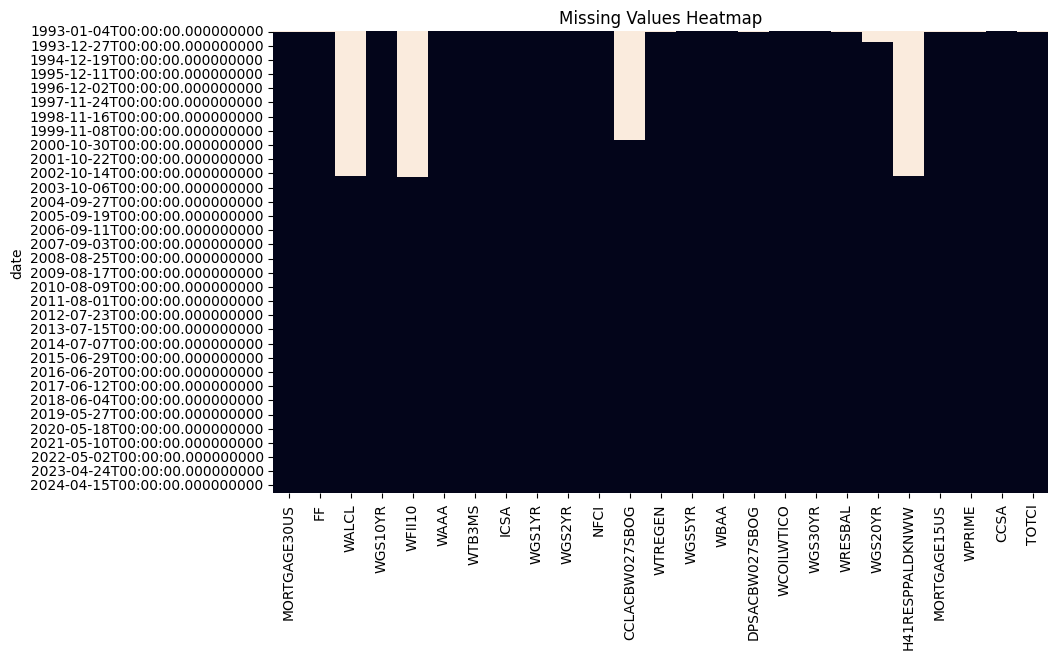

In [ ]:
# Missing values Chat
plt.figure(figsize=(10, 6))
sns.heatmap(weekly_data.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
# Mssing values a filled with foward fill
full_data_filled = miss_data.ffill()

In [ ]:
full_data_filled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1661 entries, 1993-01-04 to 2024-10-28
Freq: W-MON
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MORTGAGE30US     1660 non-null   float64
 1   FF               1660 non-null   float64
 2   WALCL            1141 non-null   float64
 3   WGS10YR          1661 non-null   float64
 4   WFII10           1139 non-null   float64
 5   WAAA             1661 non-null   float64
 6   WTB3MS           1661 non-null   float64
 7   ICSA             1661 non-null   float64
 8   WGS1YR           1661 non-null   float64
 9   WGS2YR           1661 non-null   float64
 10  NFCI             1661 non-null   float64
 11  CCLACBW027SBOG   1270 non-null   float64
 12  WTREGEN          1660 non-null   float64
 13  WGS5YR           1661 non-null   float64
 14  WBAA             1661 non-null   float64
 15  DPSACBW027SBOG   1660 non-null   float64
 16  WCOILWTICO       1661 non-null

In [ ]:
full_data_filled.tail()

,MORTGAGE30US,FF,WALCL,WGS10YR,WFII10,WAAA,WTB3MS,ICSA,WGS1YR,WGS2YR,...,DPSACBW027SBOG,WCOILWTICO,WGS30YR,WRESBAL,WGS20YR,H41RESPPALDKNWW,MORTGAGE15US,WPRIME,CCSA,TOTCI
date,,,,,,,,,,,,,,,,,,,,,
2024-09-30,6.08,4.83,7080059.0,3.76,1.59,4.69,4.51,225000.0,3.91,3.55,...,17777.4023,70.22,4.11,3169.149,4.15,85941.0,5.16,8.0,1858000.0,2787.3026
2024-10-07,6.12,4.83,7046925.0,3.83,1.63,4.74,4.50,260000.0,4.03,3.71,...,17830.8740,71.83,4.16,3089.598,4.22,71468.0,5.25,8.0,1869000.0,2789.3899
2024-10-14,6.32,4.83,7046840.0,4.06,1.76,4.91,4.54,242000.0,4.22,3.98,...,17761.1081,75.69,4.35,3186.207,4.41,68883.0,5.41,8.0,1888000.0,2777.6523
2024-10-21,6.44,4.83,7039284.0,4.06,1.77,4.90,4.53,228000.0,4.19,3.95,...,17846.2339,70.81,4.35,3209.877,4.40,66833.0,5.63,8.0,1862000.0,2788.1722
2024-10-28,6.54,4.83,7029408.0,4.22,1.91,5.08,4.51,216000.0,4.26,4.06,...,17833.2972,71.59,4.49,3230.145,4.56,59717.0,5.71,8.0,1862000.0,2788.1666


In [ ]:
data_ok = full_data_filled.dropna()

data_ok.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1139 entries, 2003-01-06 to 2024-10-28
Freq: W-MON
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MORTGAGE30US     1139 non-null   float64
 1   FF               1139 non-null   float64
 2   WALCL            1139 non-null   float64
 3   WGS10YR          1139 non-null   float64
 4   WFII10           1139 non-null   float64
 5   WAAA             1139 non-null   float64
 6   WTB3MS           1139 non-null   float64
 7   ICSA             1139 non-null   float64
 8   WGS1YR           1139 non-null   float64
 9   WGS2YR           1139 non-null   float64
 10  NFCI             1139 non-null   float64
 11  CCLACBW027SBOG   1139 non-null   float64
 12  WTREGEN          1139 non-null   float64
 13  WGS5YR           1139 non-null   float64
 14  WBAA             1139 non-null   float64
 15  DPSACBW027SBOG   1139 non-null   float64
 16  WCOILWTICO       1139 non-null

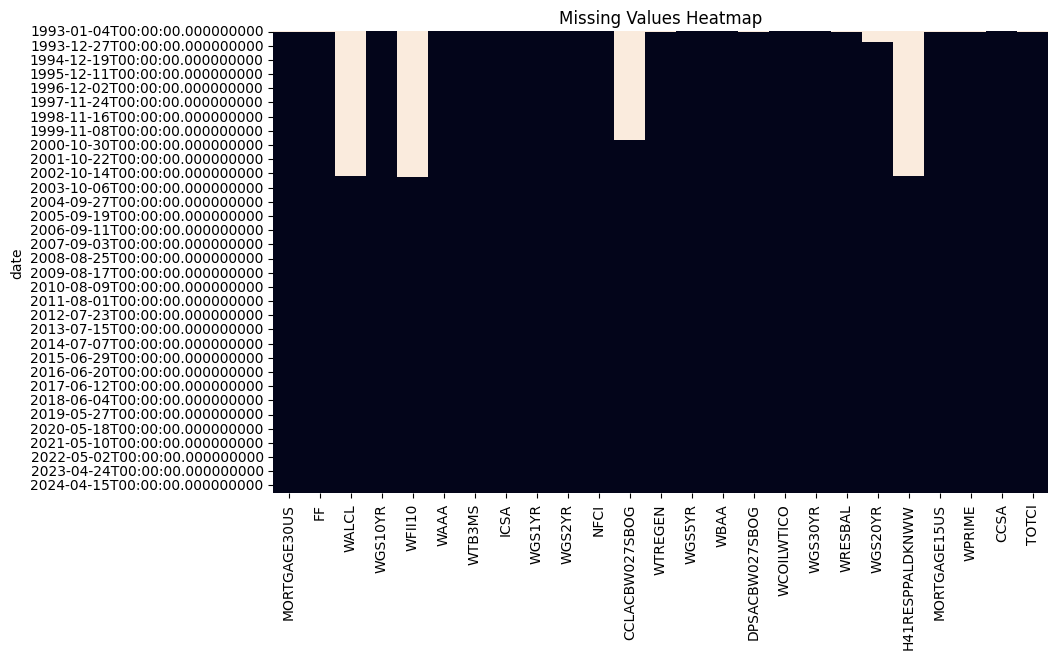

In [ ]:
# Missing values Chat
plt.figure(figsize=(10, 6))
sns.heatmap(weekly_data.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

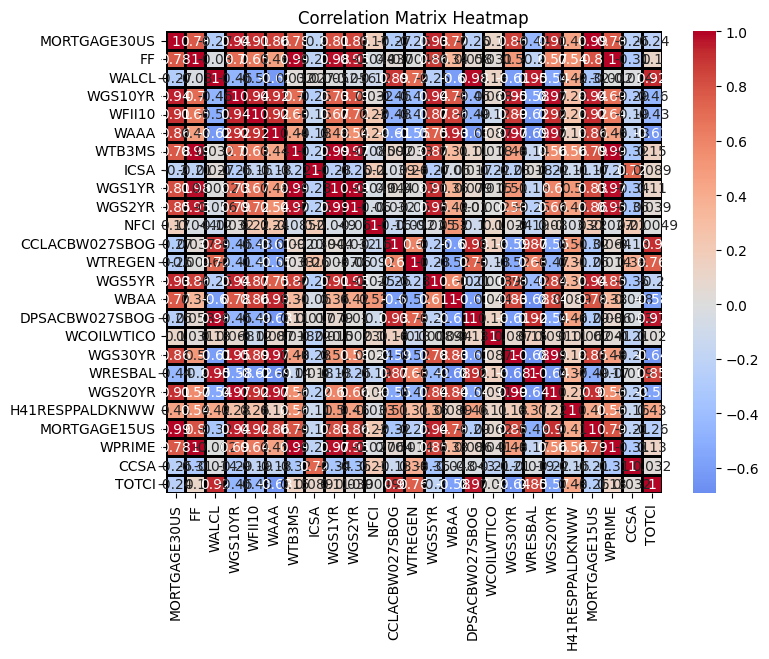

In [ ]:
data_corr = data_ok.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(data_corr, annot=True, cmap='coolwarm', center=0, linewidths=1, linecolor='black')
plt.title('Correlation Matrix Heatmap')
plt.show()

# 5 ETF Weekly

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import requests


In [ ]:
import yfinance as yf

# Download data for a specific ETF (e.g., SPY)
etf = yf.download('SPY', start='1993-01-01', end='2025-01-01')

# When loading your dataset, make sure to set the frequency
etf.index = pd.date_range(start=etf.index[0], periods=len(etf), freq='D')

etf.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
1993-01-29,43.96875,43.96875,43.75000,43.93750,24.608620,1003200
1993-01-30,43.96875,44.25000,43.96875,44.25000,24.783648,480500
1993-01-31,44.21875,44.37500,44.12500,44.34375,24.836151,201300
1993-02-01,44.40625,44.84375,44.37500,44.81250,25.098700,529400
1993-02-02,44.96875,45.09375,44.46875,45.00000,25.203718,531500


In [ ]:
etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8000 entries, 1993-01-29 to 2014-12-24
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8000 non-null   float64
 1   High       8000 non-null   float64
 2   Low        8000 non-null   float64
 3   Close      8000 non-null   float64
 4   Adj Close  8000 non-null   float64
 5   Volume     8000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 437.5 KB


In [ ]:
etf['RoR_Percentage'] = 100*(etf['Close']-etf['Open'])/etf['Open']

etf['IntraDay_Diff'] = etf['Open']-etf['Close'].shift(1)

In [ ]:
max_7d = etf['High'].rolling(window=7).max()
min_7d = etf['Low'].rolling(window=7).min()

# Calculate weekly volatility as the difference between the max and min over 7 days
etf['Weekly_Volatility'] = max_7d - min_7d

In [ ]:
etf.head(15)

,Open,High,Low,Close,Adj Close,Volume,RoR_Percentage,IntraDay_Diff,Weekly_Volatility
1993-01-29,43.96875,43.96875,43.75000,43.93750,24.608620,1003200,-0.071073,NaN,NaN
1993-01-30,43.96875,44.25000,43.96875,44.25000,24.783648,480500,0.639659,0.03125,NaN
1993-01-31,44.21875,44.37500,44.12500,44.34375,24.836151,201300,0.282686,-0.03125,NaN
1993-02-01,44.40625,44.84375,44.37500,44.81250,25.098700,529400,0.914849,0.06250,NaN
1993-02-02,44.96875,45.09375,44.46875,45.00000,25.203718,531500,0.069493,0.15625,NaN
1993-02-03,44.96875,45.06250,44.71875,44.96875,25.186209,492100,0.000000,-0.03125,NaN
1993-02-04,44.96875,45.12500,44.90625,44.96875,25.186209,596100,0.000000,0.00000,1.37500
1993-02-05,44.81250,44.81250,44.56250,44.65625,25.011179,122100,-0.348675,-0.15625,1.15625
1993-02-06,44.65625,44.75000,44.53125,44.71875,25.046188,379600,0.139958,0.00000,1.00000
1993-02-07,44.78125,45.12500,44.78125,44.93750,25.168713,19500,0.348918,0.06250,0.75000


In [ ]:
etf_model = etf.drop(['Open', 'High', 'Low', 'Adj Close'], axis=1)

In [ ]:
etf_model.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8000 entries, 1993-01-29 to 2014-12-24
Freq: D
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Close              8000 non-null   float64
 1   Volume             8000 non-null   int64  
 2   RoR_Percentage     8000 non-null   float64
 3   IntraDay_Diff      7999 non-null   float64
 4   Weekly_Volatility  7994 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 375.0 KB


In [ ]:
etf_model.head()

,Close,Volume,RoR_Percentage,IntraDay_Diff,Weekly_Volatility
1993-01-29,43.93750,1003200,-0.071073,NaN,NaN
1993-01-30,44.25000,480500,0.639659,0.03125,NaN
1993-01-31,44.34375,201300,0.282686,-0.03125,NaN
1993-02-01,44.81250,529400,0.914849,0.06250,NaN
1993-02-02,45.00000,531500,0.069493,0.15625,NaN


In [ ]:
weekly_etf = pd.DataFrame(etf_model.resample('W-MON').last()).dropna()

weekly_etf.head()

,Close,Volume,RoR_Percentage,IntraDay_Diff,Weekly_Volatility
1993-02-08,44.59375,42500,-0.626741,-0.06250,0.65625
1993-02-15,44.25000,26300,1.215154,0.03125,1.65625
1993-02-22,44.75000,40000,-0.417246,0.06250,1.06250
1993-03-01,45.31250,30800,0.000000,0.00000,1.03125
1993-03-08,45.15625,110100,0.556715,0.03125,0.93750


In [ ]:
api_key = '2817ae78096d0d0704e0c0e65bc3392e'

# Define a function to fetch FRED data
def get_fred_data(symbol):
    base_url = f"https://api.stlouisfed.org/fred/series/observations?series_id={symbol}&api_key={api_key}&file_type=json"
    response = requests.get(base_url)
    data = response.json()

    # Convert the data into a DataFrame
    df = pd.DataFrame(data['observations'])

    # Rename the 'value' column to the symbol name
    df = df[['date', 'value']].rename(columns={'value': symbol})

    # Convert 'value' column to numeric
    df[symbol] = pd.to_numeric(df[symbol], errors='coerce')

    # Set 'date' as the index
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    return df

In [ ]:
# List of symbols (example)
symbols = ['T10Y2Y', 'T10Y3M', 'BAA10Y']

# Fetch and combine data
dataframes = []
for symbol in symbols:
    df = get_fred_data(symbol)
    dataframes.append(df)

# Combine all the DataFrames into one
full_data = pd.concat(dataframes, axis=1)

In [ ]:
# Display the result
full_data.head(20)

,T10Y2Y,T10Y3M,BAA10Y
date,,,
1976-06-01,0.68,NaN,NaN
1976-06-02,0.71,NaN,NaN
1976-06-03,0.70,NaN,NaN
1976-06-04,0.77,NaN,NaN
1976-06-07,0.79,NaN,NaN
1976-06-08,0.79,NaN,NaN
1976-06-09,0.82,NaN,NaN
1976-06-10,0.86,NaN,NaN
1976-06-11,0.83,NaN,NaN


In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12636 entries, 1976-06-01 to 2024-11-05
Freq: B
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T10Y2Y  12106 non-null  float64
 1   T10Y3M  10715 non-null  float64
 2   BAA10Y  9713 non-null   float64
dtypes: float64(3)
memory usage: 394.9 KB


In [ ]:
data = pd.merge(etf_model, full_data[['T10Y2Y',	'T10Y3M', 'BAA10Y']], how='outer', left_index=True, right_index=True)
data.head()

,Close,Volume,RoR_Percentage,IntraDay_Diff,Weekly_Volatility,T10Y2Y,T10Y3M,BAA10Y
1976-06-01,NaN,NaN,NaN,NaN,NaN,0.68,NaN,NaN
1976-06-02,NaN,NaN,NaN,NaN,NaN,0.71,NaN,NaN
1976-06-03,NaN,NaN,NaN,NaN,NaN,0.70,NaN,NaN
1976-06-04,NaN,NaN,NaN,NaN,NaN,0.77,NaN,NaN
1976-06-07,NaN,NaN,NaN,NaN,NaN,0.79,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14922 entries, 1976-06-01 to 2024-11-05
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Close              8000 non-null   float64
 1   Volume             8000 non-null   float64
 2   RoR_Percentage     8000 non-null   float64
 3   IntraDay_Diff      7999 non-null   float64
 4   Weekly_Volatility  7994 non-null   float64
 5   T10Y2Y             12106 non-null  float64
 6   T10Y3M             10715 non-null  float64
 7   BAA10Y             9713 non-null   float64
dtypes: float64(8)
memory usage: 1.0 MB


In [ ]:
data.dropna(axis=0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5477 entries, 1993-02-04 to 2014-12-24
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Close              5477 non-null   float64
 1   Volume             5477 non-null   float64
 2   RoR_Percentage     5477 non-null   float64
 3   IntraDay_Diff      5477 non-null   float64
 4   Weekly_Volatility  5477 non-null   float64
 5   T10Y2Y             5477 non-null   float64
 6   T10Y3M             5477 non-null   float64
 7   BAA10Y             5477 non-null   float64
dtypes: float64(8)
memory usage: 385.1 KB


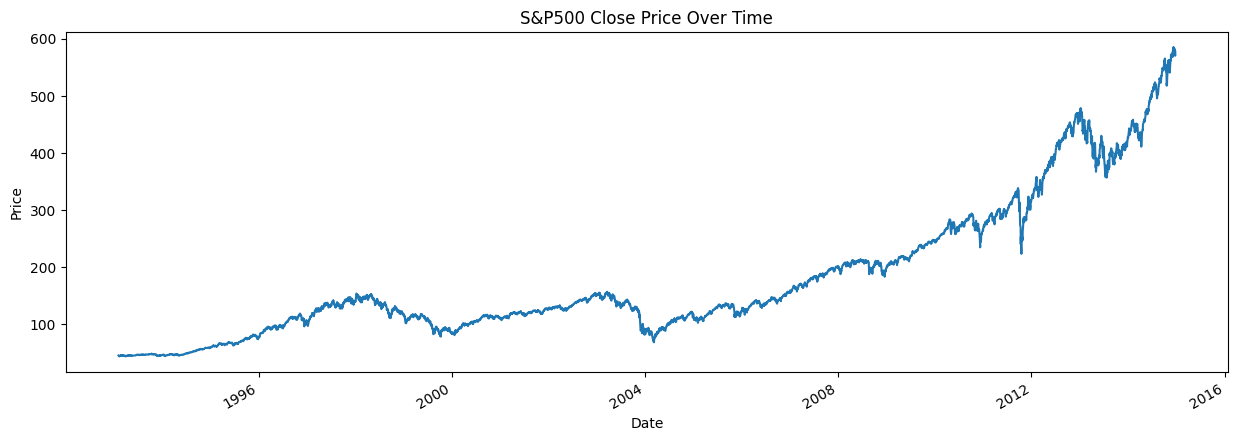

In [ ]:
data['Close'].plot(figsize=(15, 5), title='S&P500 Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

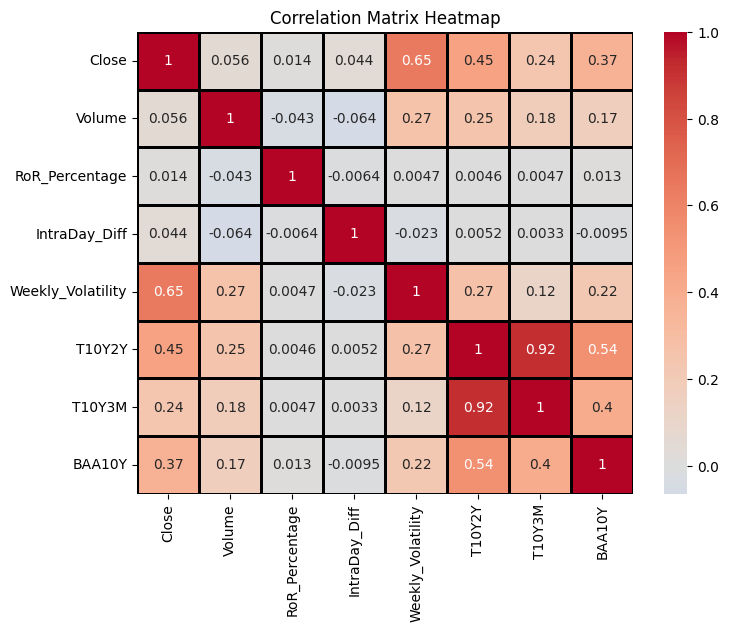

In [ ]:
data_corr = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(data_corr, annot=True, cmap='coolwarm', center=0, linewidths=1, linecolor='black')
plt.title('Correlation Matrix Heatmap')
plt.show()